<a href="https://colab.research.google.com/github/sheikh495/database/blob/main/M10_9_Coding_Employee_Management_System_PythonandSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Set Up the Database

In [1]:
from google.colab import files
uploaded = files.upload()  # Upload the chinook.db file


Saving chinook.db to chinook.db


# Step 2: Connecting to the Database

In [31]:
import sqlite3

def connect_to_db(db_path):
    try:
        # Establish a connection to the SQLite database
        conn = sqlite3.connect(db_path)
        print("Connection successful!")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Path to the uploaded chinook.db file in Google Colab
db_path = "/content/chinook.db"

# Connect to the database
conn = connect_to_db(db_path)


Connection successful!


ERD Diagram

In [3]:
import sqlite3

def get_database_schema(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Query to get all tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    schema = {}

    for table in tables:
        table_name = table[0]
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        schema[table_name] = columns

    conn.close()
    return schema

# Path to the chinook database
db_path = "/content/chinook.db"
schema = get_database_schema(db_path)

# Print the schema for inspection
for table, columns in schema.items():
    print(f"Table: {table}")
    for column in columns:
        print(f"  Column: {column[1]} - Type: {column[2]} - Not Null: {column[3]}")


Table: albums
  Column: AlbumId - Type: INTEGER - Not Null: 1
  Column: Title - Type: NVARCHAR(160) - Not Null: 1
  Column: ArtistId - Type: INTEGER - Not Null: 1
Table: sqlite_sequence
  Column: name - Type:  - Not Null: 0
  Column: seq - Type:  - Not Null: 0
Table: artists
  Column: ArtistId - Type: INTEGER - Not Null: 1
  Column: Name - Type: NVARCHAR(120) - Not Null: 0
Table: customers
  Column: CustomerId - Type: INTEGER - Not Null: 1
  Column: FirstName - Type: NVARCHAR(40) - Not Null: 1
  Column: LastName - Type: NVARCHAR(20) - Not Null: 1
  Column: Company - Type: NVARCHAR(80) - Not Null: 0
  Column: Address - Type: NVARCHAR(70) - Not Null: 0
  Column: City - Type: NVARCHAR(40) - Not Null: 0
  Column: State - Type: NVARCHAR(40) - Not Null: 0
  Column: Country - Type: NVARCHAR(40) - Not Null: 0
  Column: PostalCode - Type: NVARCHAR(10) - Not Null: 0
  Column: Phone - Type: NVARCHAR(24) - Not Null: 0
  Column: Fax - Type: NVARCHAR(24) - Not Null: 0
  Column: Email - Type: NVARCHA

In [4]:
!pip install graphviz sqlite3


ERROR: Could not find a version that satisfies the requirement sqlite3 (from versions: none)
ERROR: No matching distribution found for sqlite3


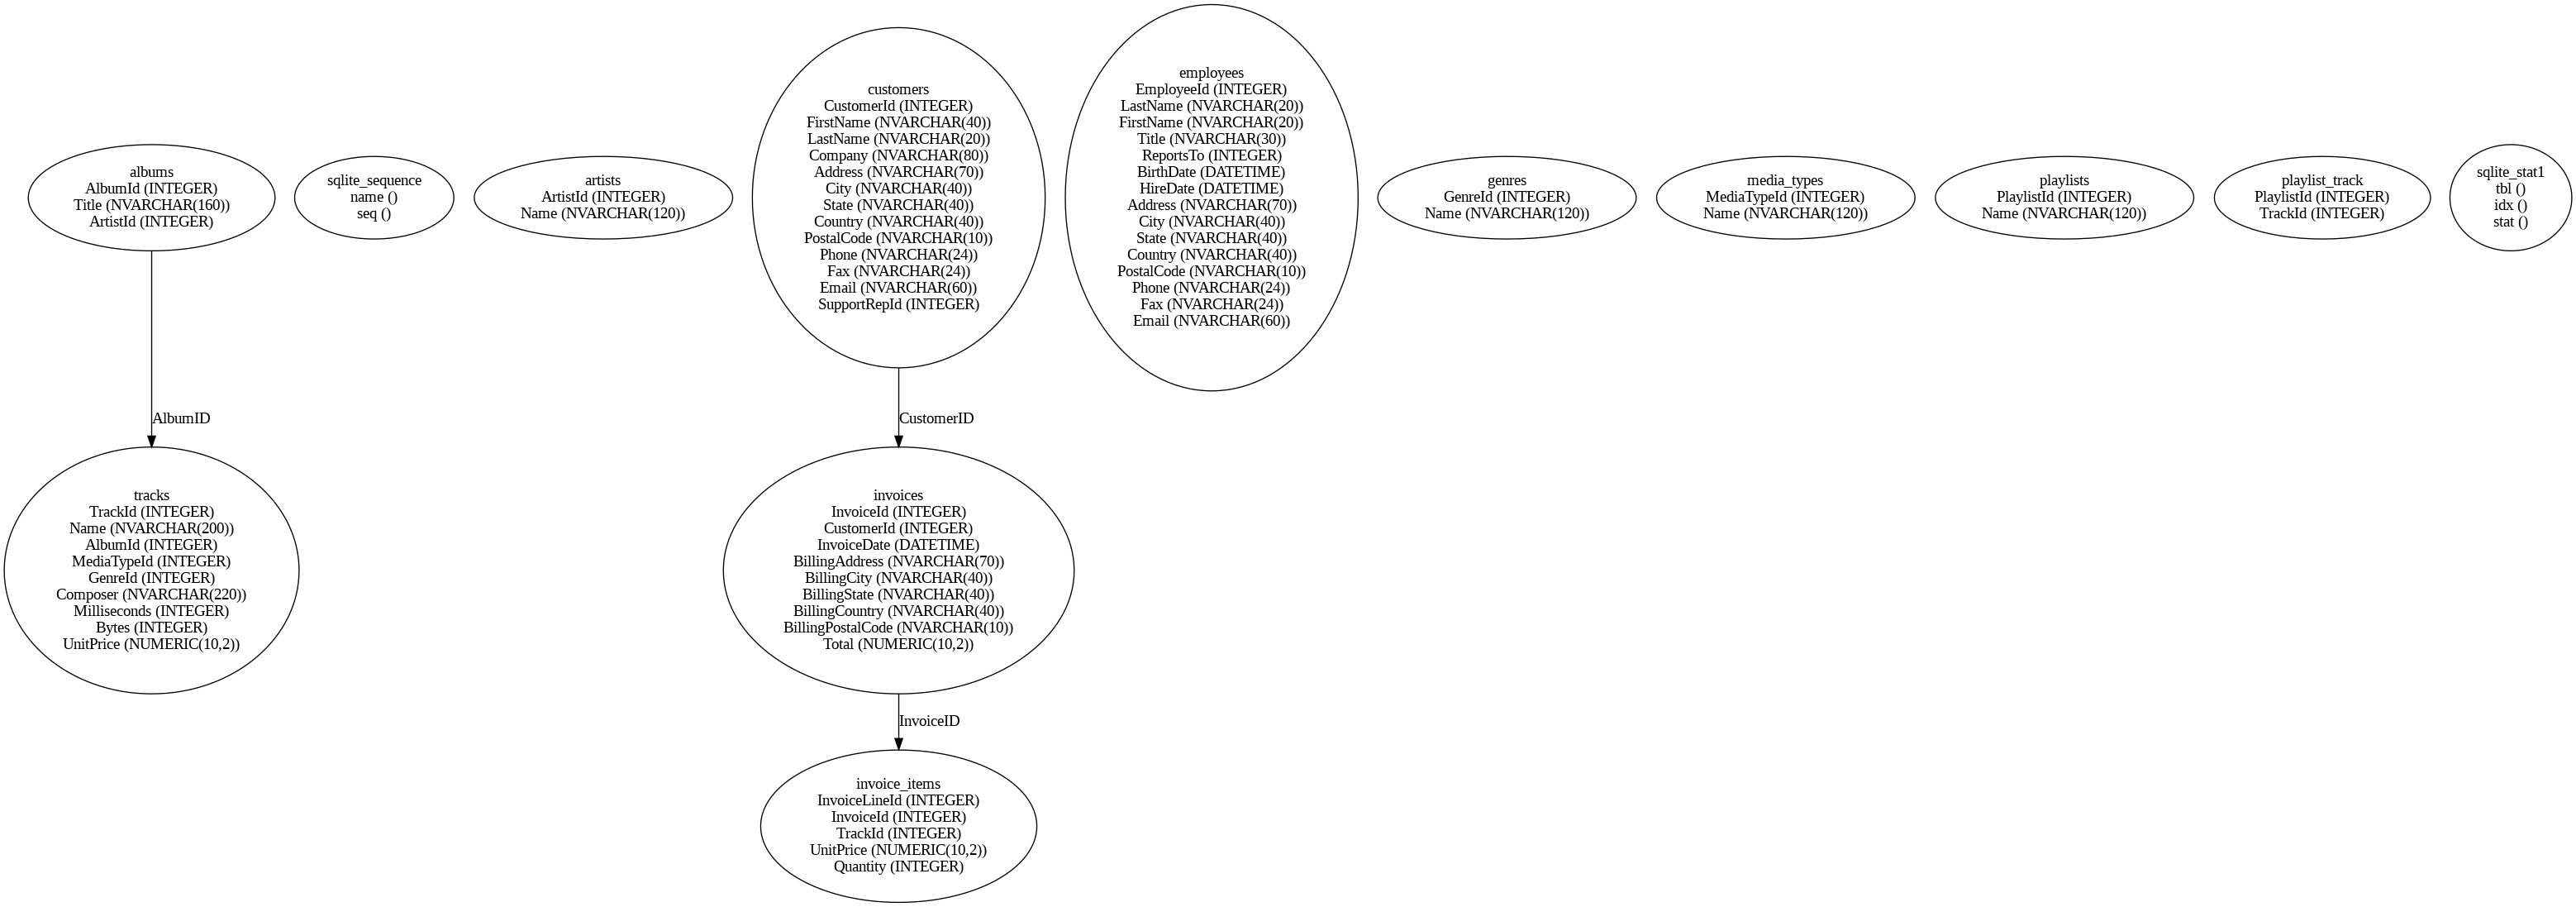

In [5]:
from graphviz import Digraph

# Function to generate a simple ERD based on the schema
def generate_erd(schema):
    dot = Digraph(comment='ERD for Chinook Database')

    # Adding nodes for each table
    for table, columns in schema.items():
        label = f"{table}\n" + "\n".join([f"{col[1]} ({col[2]})" for col in columns])
        dot.node(table, label)

    # Example of adding relationships (you can define your own relationships here)
    dot.edge('customers', 'invoices', label='CustomerID')
    dot.edge('invoices', 'invoice_items', label='InvoiceID')
    dot.edge('albums', 'tracks', label='AlbumID')

    return dot

# Generate ERD
erd = generate_erd(schema)

# Render and view the ERD in Colab
erd.render('/content/erd_output', format='png', cleanup=True)

# Display the ERD
from IPython.display import Image
Image('/content/erd_output.png')


In [6]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [7]:
import sqlite3

def get_database_schema(db_path):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Query to get all tables in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    schema = {}

    for table in tables:
        table_name = table[0]
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()
        schema[table_name] = columns

    conn.close()
    return schema

# Path to your database file (you can modify this if it's stored on Google Drive)
db_path = "/content/chinook.db"

schema = get_database_schema(db_path)

# Print schema for inspection
for table, columns in schema.items():
    print(f"Table: {table}")
    for column in columns:
        print(f"  Column: {column[1]} - Type: {column[2]} - Not Null: {column[3]}")


Table: albums
  Column: AlbumId - Type: INTEGER - Not Null: 1
  Column: Title - Type: NVARCHAR(160) - Not Null: 1
  Column: ArtistId - Type: INTEGER - Not Null: 1
Table: sqlite_sequence
  Column: name - Type:  - Not Null: 0
  Column: seq - Type:  - Not Null: 0
Table: artists
  Column: ArtistId - Type: INTEGER - Not Null: 1
  Column: Name - Type: NVARCHAR(120) - Not Null: 0
Table: customers
  Column: CustomerId - Type: INTEGER - Not Null: 1
  Column: FirstName - Type: NVARCHAR(40) - Not Null: 1
  Column: LastName - Type: NVARCHAR(20) - Not Null: 1
  Column: Company - Type: NVARCHAR(80) - Not Null: 0
  Column: Address - Type: NVARCHAR(70) - Not Null: 0
  Column: City - Type: NVARCHAR(40) - Not Null: 0
  Column: State - Type: NVARCHAR(40) - Not Null: 0
  Column: Country - Type: NVARCHAR(40) - Not Null: 0
  Column: PostalCode - Type: NVARCHAR(10) - Not Null: 0
  Column: Phone - Type: NVARCHAR(24) - Not Null: 0
  Column: Fax - Type: NVARCHAR(24) - Not Null: 0
  Column: Email - Type: NVARCHA

In [8]:
from graphviz import Digraph

def create_erd():
    # Initialize Graphviz Digraph
    dot = Digraph(comment='Chinook Database ERD')

    # Add nodes for each table (representing entities)
    dot.node('employees', 'employees')
    dot.node('customers', 'customers')
    dot.node('invoices', 'invoices')
    dot.node('invoice_items', 'invoice_items')
    dot.node('tracks', 'tracks')
    dot.node('albums', 'albums')
    dot.node('artists', 'artists')
    dot.node('genres', 'genres')
    dot.node('media_types', 'media_types')
    dot.node('playlists', 'playlists')

    # Add edges for relationships (One-to-Many / Many-to-Many)
    dot.edge('employees', 'customers', label='1-to-many (EmployeeID -> SupportRepID)')
    dot.edge('customers', 'invoices', label='1-to-many (CustomerID -> CustomerID)')
    dot.edge('invoices', 'invoice_items', label='1-to-many (InvoiceID -> InvoiceID)')
    dot.edge('albums', 'tracks', label='1-to-many (AlbumID -> AlbumID)')
    dot.edge('tracks', 'playlists', label='many-to-many (TrackID <-> PlaylistID)')

    # Render the ERD
    dot.render('/content/erd', format='png', view=True)

# Create and render the ERD
create_erd()


In [9]:
from PIL import Image

# Display the generated ERD image
img = Image.open('/content/erd.png')
img.show()


In [10]:
!pip install eralchemy sqlalchemy


In [34]:
import eralchemy

# Path to your SQLite database file
db_path = "/content/chinook.db"

# Path to save the ER diagram
output_path = "/content/chinook_diagram.png"

# Generate and save the ER diagram to a PNG file
eralchemy.render_er(f"sqlite:///{db_path}", output_path)

print(f"ER diagram saved to {output_path}")


ER diagram saved to /content/chinook_diagram.png


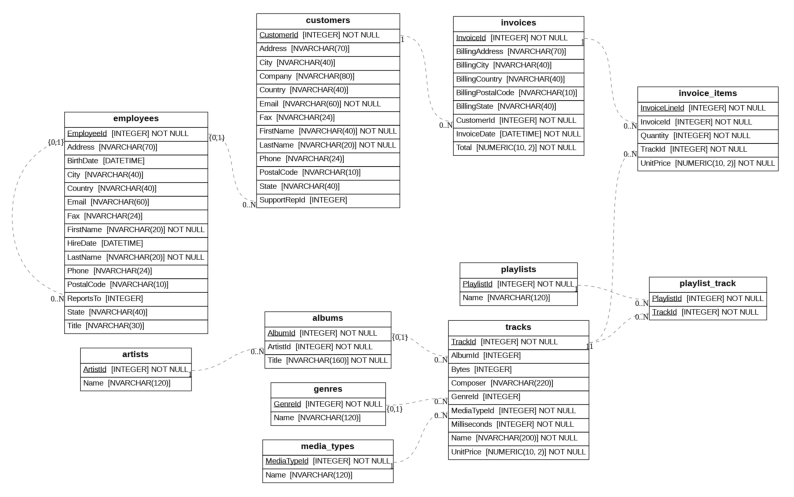

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the ER diagram image
img = mpimg.imread(output_path)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


ER diagram saved to /content/chinook_diagram.png


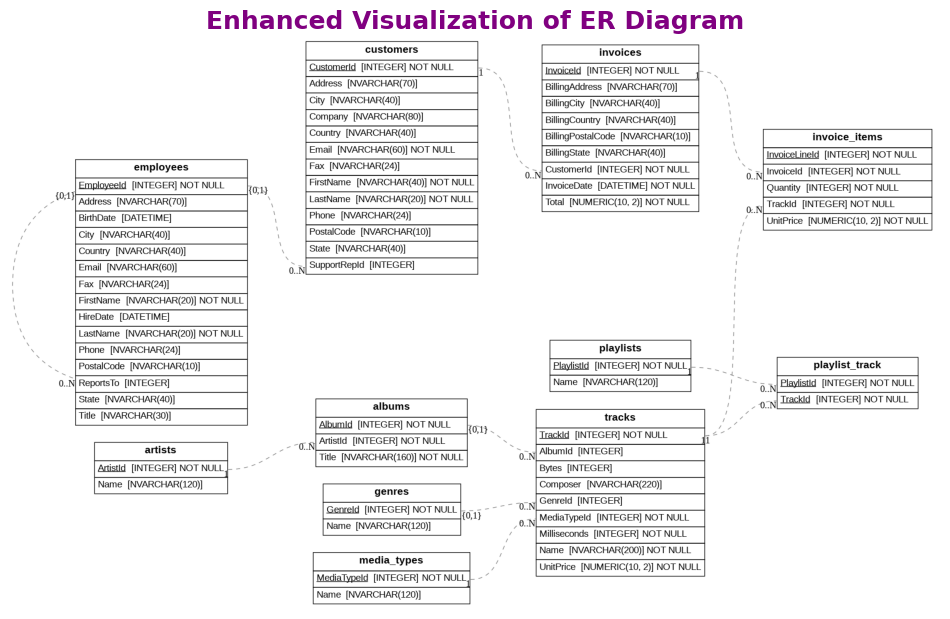

In [37]:
import eralchemy

# Path to your SQLite database file
db_path = "/content/chinook.db"

# Path to save the ER diagram
output_path = "/content/chinook_diagram.png"

# Generate and save the ER diagram to a PNG file
eralchemy.render_er(f"sqlite:///{db_path}", output_path)

print(f"ER diagram saved to {output_path}")

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the ER diagram image with enhanced visualization
img = mpimg.imread(output_path)
plt.figure(figsize=(12, 10))  # Larger size for better visibility
plt.imshow(img, interpolation='antialiased')  # Smoother rendering
plt.axis('off')  # Hide axes for a cleaner view
plt.title("Enhanced Visualization of ER Diagram", fontsize=18, color='purple', fontweight='bold')
plt.show()


#  List All Table Names and Column Headers:

In [13]:
import sqlite3

# Function to retrieve all tables and their column headers
def get_all_tables_and_headers(db_path):
    # Connect to the SQLite database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Query to get all table names in the database
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    # Dictionary to store table names and their columns
    table_columns = {}

    # Loop through all tables and retrieve column information
    for table in tables:
        table_name = table[0]

        # Query to get columns for the table
        cursor.execute(f"PRAGMA table_info({table_name});")
        columns = cursor.fetchall()

        # Extract column names for each table
        column_names = [column[1] for column in columns]
        table_columns[table_name] = column_names

    # Close the connection
    conn.close()

    return table_columns

# Path to your database file (update if stored in Google Drive or local environment)
db_path = "/content/chinook.db"

# Get all tables and their column headers
table_headers = get_all_tables_and_headers(db_path)

# Display the results
for table, columns in table_headers.items():
    print(f"Table: {table}")
    print(f"  Columns: {', '.join(columns)}")


Table: albums
  Columns: AlbumId, Title, ArtistId
Table: sqlite_sequence
  Columns: name, seq
Table: artists
  Columns: ArtistId, Name
Table: customers
  Columns: CustomerId, FirstName, LastName, Company, Address, City, State, Country, PostalCode, Phone, Fax, Email, SupportRepId
Table: employees
  Columns: EmployeeId, LastName, FirstName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email
Table: genres
  Columns: GenreId, Name
Table: invoices
  Columns: InvoiceId, CustomerId, InvoiceDate, BillingAddress, BillingCity, BillingState, BillingCountry, BillingPostalCode, Total
Table: invoice_items
  Columns: InvoiceLineId, InvoiceId, TrackId, UnitPrice, Quantity
Table: media_types
  Columns: MediaTypeId, Name
Table: playlists
  Columns: PlaylistId, Name
Table: playlist_track
  Columns: PlaylistId, TrackId
Table: tracks
  Columns: TrackId, Name, AlbumId, MediaTypeId, GenreId, Composer, Milliseconds, Bytes, UnitPrice
Table: sqlite_stat1
  Column

# Step 3: Read Records

View all employees in the employees table:

In [14]:
import pandas as pd

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Test: View all employees
if conn:
    employees_df = view_all_employees(conn)
    print(employees_df)


   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           1     Adams    Andrew      General Manager        NaN   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           3   Peacock      Jane  Sales Support Agent        2.0   
3           4      Park  Margaret  Sales Support Agent        2.0   
4           5   Johnson     Steve  Sales Support Agent        2.0   
5           6  Mitchell   Michael           IT Manager        1.0   
6           7      King    Robert             IT Staff        6.0   
7           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate                      Address  \
0  1962-02-18 00:00:00  2002-08-14 00:00:00          11120 Jasper Ave NW   
1  1958-12-08 00:00:00  2002-05-01 00:00:00                 825 8 Ave SW   
2  1973-08-29 00:00:00  2002-04-01 00:00:00                1111 6 Ave SW   
3  1947-09-19 00:00:00  2003-05-03 00:00:00             683 10 Street SW  

WWW

In [15]:
#import sqlite3
#import pandas as pd

# Connect to the SQLite database (make sure the file path is correct)
#conn = sqlite3.connect('/content/chinook.db')

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Test: View all employees
if conn:
    employees_df = view_all_employees(conn)
    display(employees_df)  # This will display the DataFrame as a table in Google Colab


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


View employees by job title:

In [16]:
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql_query(query, conn, params=(title,))
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees by title: {e}")

# Test: View employees by title
if conn:
    employees_with_title = view_employee_by_title(conn, "Sales Support Agent")
    print(employees_with_title)


   EmployeeId LastName FirstName                Title  ReportsTo  \
0           3  Peacock      Jane  Sales Support Agent          2   
1           4     Park  Margaret  Sales Support Agent          2   
2           5  Johnson     Steve  Sales Support Agent          2   

             BirthDate             HireDate           Address     City State  \
0  1973-08-29 00:00:00  2002-04-01 00:00:00     1111 6 Ave SW  Calgary    AB   
1  1947-09-19 00:00:00  2003-05-03 00:00:00  683 10 Street SW  Calgary    AB   
2  1965-03-03 00:00:00  2003-10-17 00:00:00      7727B 41 Ave  Calgary    AB   

  Country PostalCode              Phone                Fax  \
0  Canada    T2P 5M5  +1 (403) 262-3443  +1 (403) 262-6712   
1  Canada    T2P 5G3  +1 (403) 263-4423  +1 (403) 263-4289   
2  Canada    T3B 1Y7   1 (780) 836-9987   1 (780) 836-9543   

                      Email  
0      jane@chinookcorp.com  
1  margaret@chinookcorp.com  
2     steve@chinookcorp.com  


OR

In [17]:
#import sqlite3
#import pandas as pd

# Connect to the SQLite database
#conn = sqlite3.connect('/content/chinook.db')

# Function to view all employees

def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Function to view employees by job title
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql_query(query, conn, params=(title,))
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees by title: {e}")

# Test: View all employees
if conn:
    print("All Employees:")
    employees_df = view_all_employees(conn)
    display(employees_df)  # Display all employees

    # Example: View employees by title "Sales Support Agent"
    print("\nEmployees with 'Sales Support Agent' title:")
    title = "Sales Support Agent"  # Modify this as needed
    employees_by_title_df = view_employee_by_title(conn, title)
    display(employees_by_title_df)  # Display employees with the specified title


All Employees:


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com



Employees with 'Sales Support Agent' title:


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
1,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
2,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


OR p2

In [28]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('/content/chinook.db')

# Function to view employees by title
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql_query(query, conn, params=(title,))
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees with title {title}: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Test: View all employees with the title "Sales Support Agent"
if conn:
    title_to_search = "Sales Support Agent"  # Change the title as needed
    employees_by_title_df = view_employee_by_title(conn, title_to_search)

    # Display employees with the specific title
    display(employees_by_title_df)  # Show employees with the given title in tabular format

# Close the connection after performing operations
  #  conn.close()


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


# Step 4: Create Records

In [29]:
def add_employee(conn, employee_data):
    try:
        query = """
        INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """
        conn.execute(query, employee_data)
        conn.commit()
        print("Employee added successfully!")
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Sample data to add a new employee
new_employee = ('Sheikh', 'Uddin', 'Sales Manager', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Fairfax', 'VA', 'USA', '22030', '555-1234', '555-5678', 'suddin@example.com')

# Test: Add a new employee
if conn:
    add_employee(conn, new_employee)


Error adding employee: Cannot operate on a closed database.


OR

In [22]:
#import sqlite3
#import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('/content/chinook.db')

# Function to add a new employee
def add_employee(conn, employee_data):
    try:
        query = """
        INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """
        conn.execute(query, employee_data)
        conn.commit()
        print("Employee added successfully!")
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Sample data to add a new employee
new_employee = ('Sheikh', 'Uddin', 'Sales Manager', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Fairfax', 'VA', 'USA', '22030', '555-1234', '555-5678', 'suddin@example.com')

# Test: Add a new employee
if conn:
    add_employee(conn, new_employee)

    # Display all employees after adding the new one
    employees_df = view_all_employees(conn)
    display(employees_df)  # Show employees in tabular format


Employee added successfully!


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Manager,2.0,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 5: Update Records

In [23]:
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        print(f"Employee ID {employee_id} title updated to {new_title}")
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Test: Update the title of an existing employee
if conn:
    update_employee_title(conn, 3, 'Senior Sales Support Agent')


Employee ID 3 title updated to Senior Sales Support Agent


OR

In [24]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('/content/chinook.db')

# Function to update employee title
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        print(f"Employee ID {employee_id} title updated to {new_title}")
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Test: Update the title of an existing employee (Employee ID 3)
if conn:
    update_employee_title(conn, 4, 'Senior Sales Support Agent')

    # Display all employees after the update
    employees_df = view_all_employees(conn)

    # Display the table of employees in Google Colab
    display(employees_df)  # Show employees in tabular format

# Close the connection after performing operations
conn.close()


Employee ID 4 title updated to Senior Sales Support Agent


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Senior Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Senior Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Manager,2.0,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 6: Delete Records

In [25]:
def delete_employee(conn, employee_id):
    try:
        query = "DELETE FROM employees WHERE EmployeeID = ?"
        conn.execute(query, (employee_id,))
        conn.commit()
        print(f"Employee ID {employee_id} deleted successfully!")
    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Test: Delete the employee with ID 3
if conn:
    delete_employee(conn, 3)


Error deleting employee: Cannot operate on a closed database.


# Step 7: Close the Connection

In [ ]:
# Close the database connection
if conn:
    conn.close()
    print("Database connection closed.")
